# Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected TMDB dataset for analysis. 

Following questions I am trying to find solution for:
<ol>
 
<li><b>How budget of a movie related to revenue of the movie. Considering movies with minimum 500 votes and 5 average vote.</b></li><li>
    <b>How budget of a movie is related to average vote. Considering movies with minimum 500 votes.</b>
    
</li>
</ol>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
'''
    load_csv_file() function loads the tmdb data into pandas dataframe. It also prints first five rows.
'''
def load_csv_file(filename):
    tmdb_file = pd.read_csv(filename)
    print(len(tmdb_file))
    print(tmdb_file.head())
    
    return tmdb_file
    
tmdb_file=load_csv_file("tmdb-movies.csv")

10866
       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                

In [3]:
def desc_tmdb():
    print(tmdb_file.describe())
    
    print(tmdb_file.dtypes)
    
desc_tmdb()

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [4]:
''' Check if fields are missing'''
def check_missing():
    missing_field = tmdb_file.isnull().sum()
    print(missing_field)
    
check_missing()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [5]:
'''Checking Mean and Median'''
def cal_stats():
    
    budget_mean = tmdb_file['budget'].mean()
    budget_median = tmdb_file['budget'].median()
    
    print("Mean is",budget_mean)
    print("Median is",budget_median)
    
    
    
cal_stats()

Mean is 14625701.09414688
Median is 0.0


<h6>Since median came as 0.0, there might be movies for which budget is recorded as 0. We will try to figure out if this is the case.</h6>


In [6]:
'''Median came as 0. We will check if budget has negetive or 0 as value'''

def print_budget():
    
    budget = tmdb_file['budget']
    neg_zero_val = []
    for data in budget:
        if data <= 0.0:
            neg_zero_val.append(data)
    
    print(len(neg_zero_val))
    
print_budget()
    


5696


<h6>In the above code we can see that there are minimum 5696 rows for which budget is 0. Next we will remove those rows.</h6>



### Data Cleaning

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
'''Removing rows where budget or revenue is 0 or less than 0'''
def remove_zero():
    new_tmdb = tmdb_file[(tmdb_file['budget'] >0.0) & (tmdb_file['revenue'] >0.0)]
    
    print(len(new_tmdb))

    return new_tmdb

tmdb_without_zero = remove_zero()


3855


<h6>remove_zero function removed all the rows from dataframe where budget or revenue was 0.</h6>



<a id='eda'></a>
## Exploratory Data Analysis

### How budget of a movie related to revenue of the movie. Considering movies with minimum 1000 votes and 5 average vote.

In [8]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

'''new_stats function prints budget's and revenue's mean and median. '''

def new_stats(new_tmdb):
    
    print(new_tmdb['budget'].mean())
    print(new_tmdb['budget'].median())
    
    print(new_tmdb['revenue'].mean())
    print(new_tmdb['revenue'].median())
    
#     print(new_tmdb.head())
    

new_stats(tmdb_without_zero)

37201828.29156939
24000000.0
107658932.66977951
44793222.0


<h6>Now we will compute ratio of revenue to budget for each movie</h6>

In [9]:
def ratio(tmdb):
    
    tmdb['ratio_revenue_budget'] = np.divide(tmdb['revenue'], tmdb['budget'])
    
    id=tmdb['ratio_revenue_budget'].idxmax()
    print(tmdb.loc[id])
    
    print(len(tmdb))
    return tmdb


tmdb = ratio(tmdb_without_zero)


id                                                                   8856
imdb_id                                                         tt0091326
popularity                                                       0.772494
budget                                                                113
revenue                                                         115103979
original_title                                    The Karate Kid, Part II
cast                    Ralph Macchio|Pat Morita|Martin Kove|Charlie T...
homepage                                                              NaN
director                                                 John G. Avildsen
tagline                                    This time, the combat is real.
keywords                 martial arts|karate|okinawa|revanche|self esteem
overview                Mr. Miyagi and Daniel take a trip to Okinawa t...
runtime                                                               113
genres                              Ad

<h6> When graph was plotted for the ratio_revenue_budget, it was evident that there are outliers the data. Next function will remove all the rows having ratio_revenue_budget as outliers</h6>

In [10]:
'''This function will remove all the rows with outliers in ratio_revenue_budget'''
def remove_outliers(tmdb):
    q = tmdb['ratio_revenue_budget'].quantile(0.99)
    tmdb_1=tmdb[tmdb['ratio_revenue_budget'] < q]

    id=tmdb_1['ratio_revenue_budget'].idxmax()
    print(tmdb_1.loc[id])
    
    print(len(tmdb_1))
    return tmdb_1

tmdb_without_outliers=remove_outliers(tmdb)



id                                                                  14438
imdb_id                                                         tt1129423
popularity                                                       0.280555
budget                                                             500000
revenue                                                          33456317
original_title                                                  Fireproof
cast                    Kirk Cameron|Erin Bethea|Ken Bevel|Stephen Der...
homepage                                http://www.fireproofthemovie.com/
director                                                    Alex Kendrick
tagline                                  Never Leave Your Partner Behind.
keywords                father-son relationship|fire|firemen|christian...
overview                In Albany, the marriage of Caleb end Catherine...
runtime                                                               122
genres                                

<h5>Next we will filter the rows where movies have more than 500 vote counts and vote average is more than 5.

In [11]:
def movies_with_1000_votes(tmdb_without_outliers):
    tmdb_with_1000_votes = tmdb_without_outliers[(tmdb_without_outliers['vote_count']>1000) & (tmdb_without_outliers['vote_average']>5)]
    print(tmdb_with_1000_votes.head())
    print(len(tmdb_with_1000_votes))
    return tmdb_with_1000_votes
    
tmdb_with_1000_votes=movies_with_1000_votes(tmdb_without_outliers)

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [12]:
'''Mean median and other stats for revenue to budget ratio'''
def revenue_to_budget_stats(tmdb_with_1000_votes):
    print("Mean is",tmdb_with_1000_votes['ratio_revenue_budget'].mean())
    print("Median is",tmdb_with_1000_votes['ratio_revenue_budget'].median())
    print("Max is",tmdb_with_1000_votes['ratio_revenue_budget'].max())
    print("Min is",tmdb_with_1000_votes['ratio_revenue_budget'].min())
    
    
    
revenue_to_budget_stats(tmdb_with_1000_votes)
    
    

Mean is 5.837153338042944
Median is 3.9653850430107527
Max is 55.163268125
Min is 0.211753666667


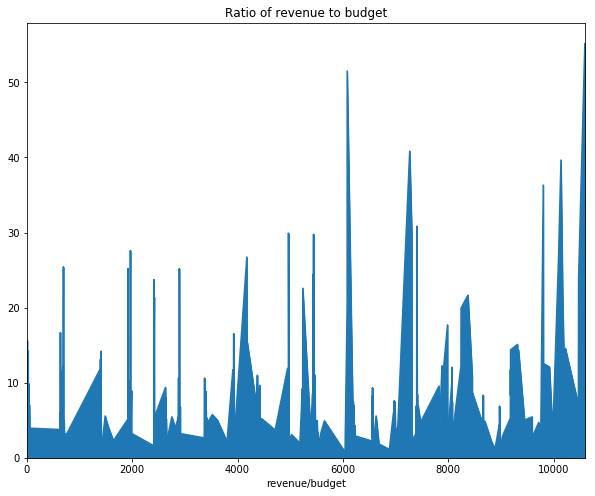

In [41]:
def plot_graph(tmdb_with_1000_votes):
    
    ratio_revenue_budget = tmdb_with_1000_votes['ratio_revenue_budget']
    my_plot = ratio_revenue_budget.plot(figsize=(10, 8),kind='area'  ,title='Ratio of revenue to budget').set_xlabel("revenue/budget")
#     print(t)

plot_graph(tmdb_with_1000_votes)

### How budget of a movie is related to average vote. Considering movies with minimum 500 votes.

In [28]:
'''filtering the movies with more than 500 votes'''

def tmdb_with_500_votes(tmdb_without_outliers):
    tmdb_with_500_vote = tmdb_without_outliers[tmdb_without_outliers['vote_count']>5000]
    print(tmdb_with_500_vote.head())
    print(len(tmdb_with_500_vote))
    return tmdb_with_500_vote

tmdb_with_500_vote = tmdb_with_500_votes(tmdb_without_outliers)

         id    imdb_id  popularity     budget     revenue  \
0    135397  tt0369610   32.985763  150000000  1513528810   
1     76341  tt1392190   28.419936  150000000   378436354   
3    140607  tt2488496   11.173104  200000000  2068178225   
629  157336  tt0816692   24.949134  165000000   621752480   
630  118340  tt2015381   14.311205  170000000   773312399   

                   original_title  \
0                  Jurassic World   
1              Mad Max: Fury Road   
3    Star Wars: The Force Awakens   
629                  Interstellar   
630       Guardians of the Galaxy   

                                                  cast  \
0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
629  Matthew McConaughey|Jessica Chastain|Anne Hath...   
630  Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   

                                              homepage       

In [19]:
'''Standardizing the data'''
def standardize(tmdb_with_500_vote):

    tmdb_with_500_vote['budget_adj'] = (tmdb_with_500_vote['budget_adj'] - tmdb_with_500_vote['budget_adj'].mean())/tmdb_with_500_vote['budget_adj'].std()
    tmdb_with_500_vote['vote_average'] = (tmdb_with_500_vote['vote_average'] - tmdb_with_500_vote['vote_average'].mean())/tmdb_with_500_vote['vote_average'].std()
    return tmdb_with_500_vote
    
tmdb_standardize = standardize(tmdb_with_500_vote)
    

In [23]:
def corelation(tmdb_standardize):

    print(tmdb_standardize['budget_adj'].corr(tmdb_standardize['vote_average']))
    
corelation(tmdb_standardize)

-0.251364289165


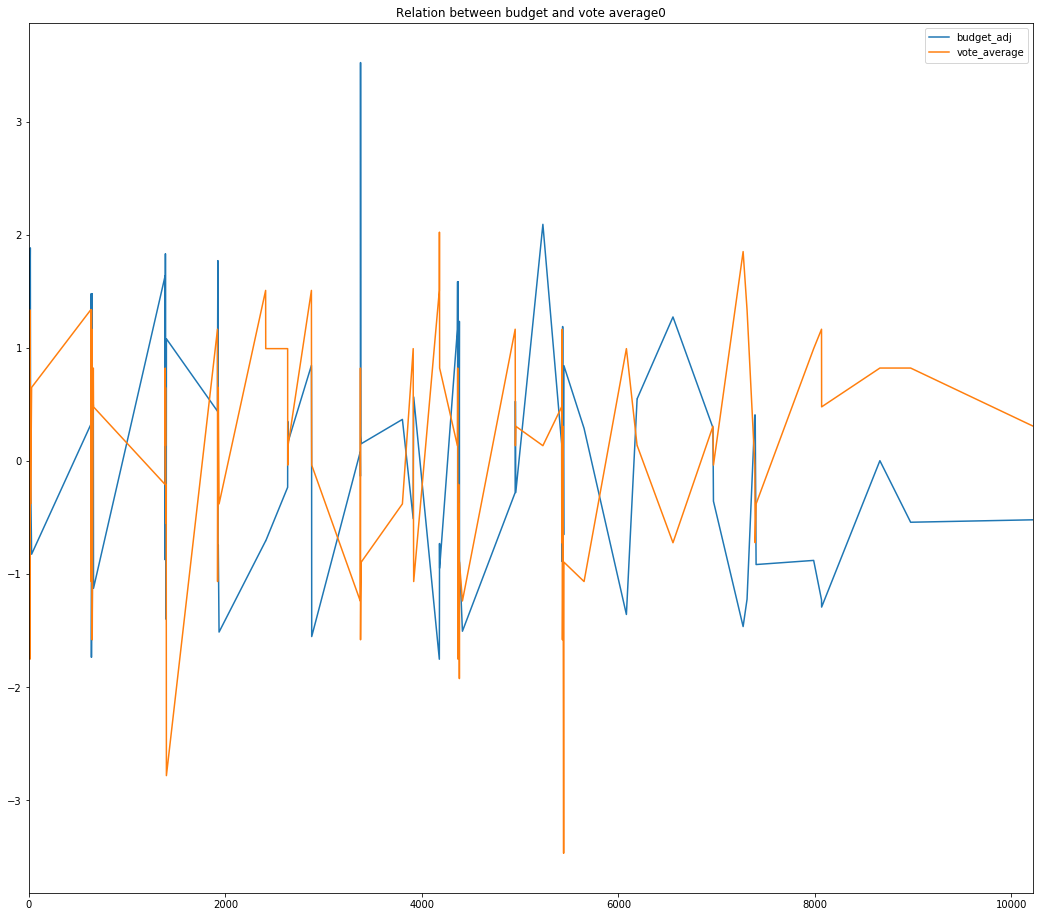

In [43]:
tmdb_standardize[['budget_adj','vote_average']].plot(figsize=(18, 16),title='Relation between budget and vote average0')


<a id='conclusions'></a>
## Conclusions


From 1st Question, ie How budget of a movie related to revenue of the movie. Considering movies with minimum 1000 votes and 5 average vote, following results came:

<h4>Movies with 5 average vote tends to earn 5 times than the budget on an average. This may be wrong as we had very limited dataset after cleaning and filtering the data. Also other factors may be present to manipulate.</h4>

From 2nd Question, ie How budget of a movie is related to average vote. Considering movies with minimum 500 votes.following results came:

<h4>There is a negetive corelation between budget(adjusted) and averavge rating. This again may not be true because of other factors.</h4>